In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
file = '../lidar/data/pyronear_cam_data/brison_4/pyronear_brison_4_2023_07_04T06_07_57.jpg'
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Read image 
  
# Setting parameter values 
t_lower = 50  # Lower Threshold 
t_upper = 150  # Upper threshold 
  
# Applying the Canny Edge filter 
edge = cv2.Canny(img, t_lower, t_upper) 

Text(0.5, 1.0, 'Original image, grayscale')

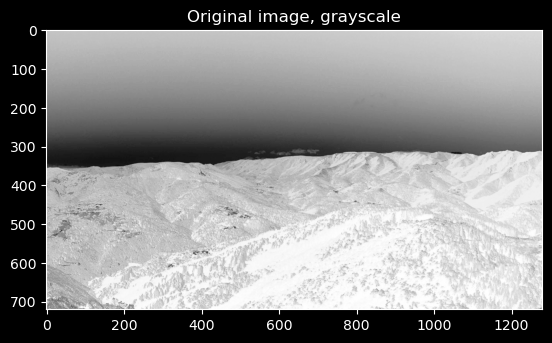

In [28]:
plt.imshow(img, cmap='Greys')
plt.title('Original image, grayscale')

Text(0.5, 1.0, 'Eroded image')

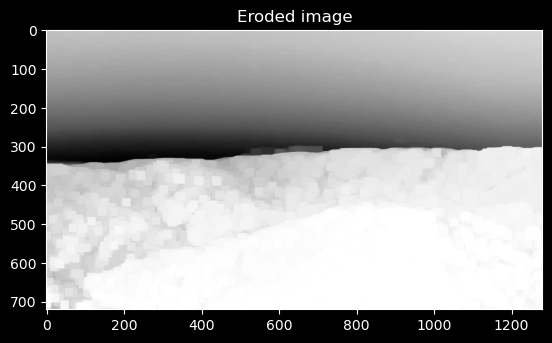

In [29]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 5)
plt.imshow(erosion, cmap='Greys')
plt.title('Eroded image')

Text(0.5, 1.0, 'Canny edge filter')

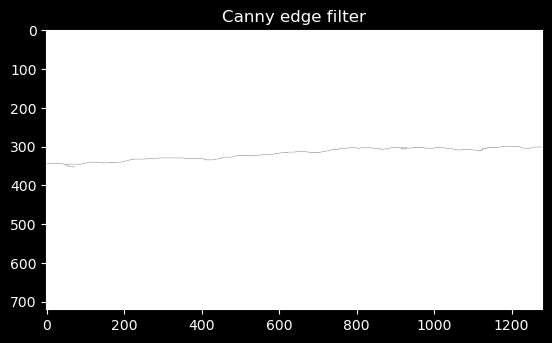

In [30]:
edges = cv2.Canny(erosion, 100, 350)
plt.imshow(edges, cmap='Greys')
plt.title("Canny edge filter")

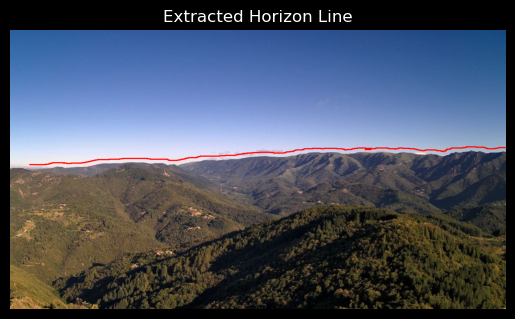

In [31]:
# Find contours in the binary mask; the largest contour should correspond to the boundary between the sky and the land
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the horizon line
# Sort the contours by area and get the largest one
horizon_contour = max(contours, key=cv2.contourArea)

# Draw the horizon contour directly on the color image
color_img = cv2.imread(file)[:,:,::-1].astype("uint8")
img_line = cv2.drawContours(color_img, [horizon_contour], -1, (255, 0, 0), thickness=2)  # Red color for visibility

# Let's display the contour image
plt.imshow(img_line)
plt.title('Extracted Horizon Line')
plt.axis('off')
plt.show()

In [32]:
np.save('../lidar/data/horizon/horizon_contour_b4.npy',horizon_contour)